In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
pd.set_option('display.max_column', 500)

In [197]:
df = pd.read_csv('data/cs-training.csv', index_col=0)
df.shape

(150000, 11)

In [198]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Splitting should always be the first thing to do, so that we do not touch the future data

In [199]:
train, test = train_test_split(df, test_size=0.15, random_state=42)

In [200]:
train.shape, test.shape

((127500, 11), (22500, 11))

## EDA

**Variable Name** --- **Description** <br>
- _SeriousDlqin2yrs_ --- Person experienced 90 days past due delinquency or worse <br>
- _RevolvingUtilizationOfUnsecuredLines_ --- Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits <br>
- _age_ --- Age of borrower in years <br>
- _NumberOfTime30-59DaysPastDueNotWorse_ --- Number of times borrower has been 30-59 days past due but no worse in the last 2 years. <br>
- _DebtRatio_ --- Monthly debt payments, alimony,living costs divided by monthy gross income <br>
- _MonthlyIncome_ --- Monthly income <br>
- _NumberOfOpenCreditLinesAndLoans_ --- Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) <br>
- _NumberOfTimes90DaysLate_ --- Number of times borrower has been 90 days or more past due. <br>
- _NumberRealEstateLoansOrLines_ --- Number of mortgage and real estate loans including home equity lines of credit <br>
- _NumberOfTime60-89DaysPastDueNotWorse_ --- Number of times borrower has been 60-89 days past due but no worse in the last 2 years. <br>
- _NumberOfDependents_ --- Number of dependents in family excluding themselves (spouse, children etc.) <br>

We will be predicting the **_SeriousDlqin2yrs_** variable which means that the borrower has not paid his due for 90 days or more.<br>
Let's analyse!

In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127500 entries, 135021 to 121959
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      127500 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  127500 non-null  float64
 2   age                                   127500 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  127500 non-null  int64  
 4   DebtRatio                             127500 non-null  float64
 5   MonthlyIncome                         102317 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       127500 non-null  int64  
 7   NumberOfTimes90DaysLate               127500 non-null  int64  
 8   NumberRealEstateLoansOrLines          127500 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  127500 non-null  int64  
 10  NumberOfDependents                    124169 non-null  float64


In [202]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,127500.000000,127500.000000,127500.000000,127500.000000,127500.000000,1.023170e+05,127500.000000,127500.000000,127500.000000,127500.000000,124169.000000
mean,0.067098,5.861725,52.289349,0.419710,350.853855,6.674925e+03,8.460047,0.264071,1.018714,0.238031,0.758498
std,0.250193,248.495280,14.766899,4.169496,1902.282052,1.490752e+04,5.146500,4.145627,1.128444,4.131237,1.115947
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029952,41.000000,0.000000,0.175434,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154388,52.000000,0.000000,0.366782,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558588,63.000000,0.000000,0.866808,8.258000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,326442.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [203]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           25183
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3331
dtype: int64

We can clearly see that monthly income and no. of dependents are having nulls. One of the reasons could be the hesitancy of revealing one's income, or they have no income at all.

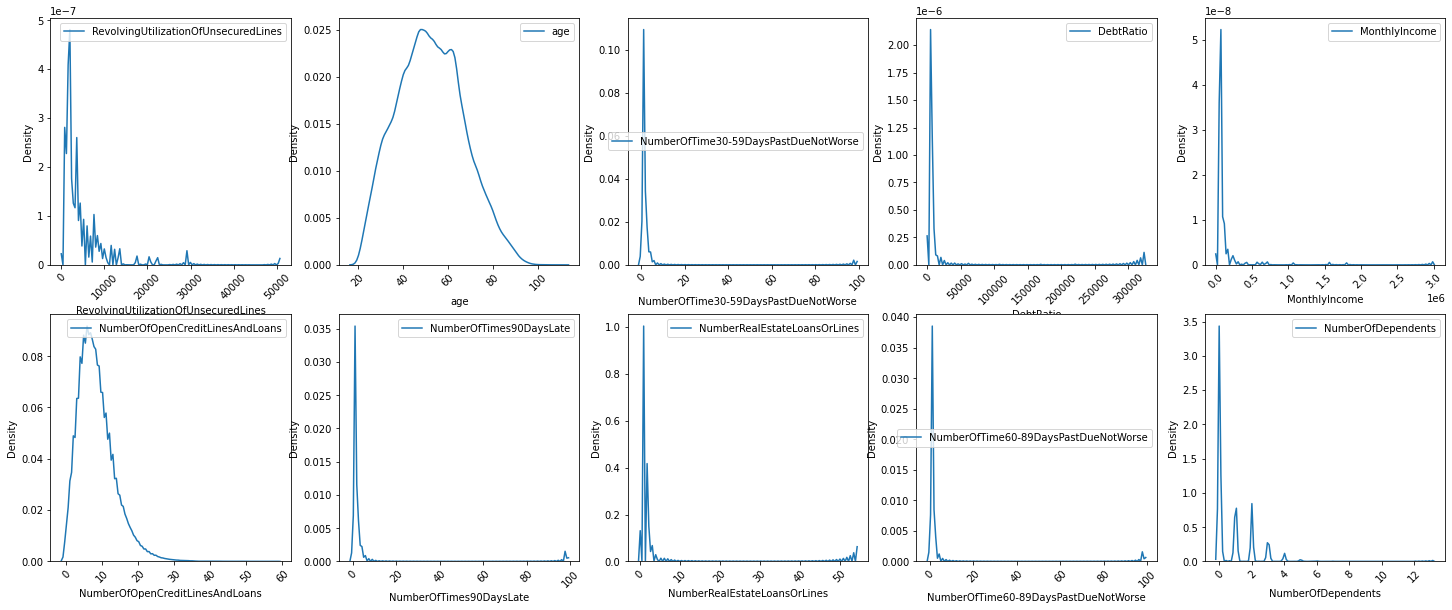

In [204]:
plt.figure(figsize=(25, 10))
plt.subplots_adjust(hspace=0.2)

for i, column_name in enumerate(train.columns[1:]):
    ax = plt.subplot(2, 5, i + 1)
    sns.kdeplot(train[column_name], ax=ax)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Density')

plt.show()

plt.figure(figsize=(25, 10))
plt.subplots_adjust(hspace=0.3)

for i, column_name in enumerate(train.columns[1:]):
    ax = plt.subplot(2, 5, i + 1)
    plt.hist(train[column_name])
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Density')

plt.show()

Since in most of the columns, maximum values belong to one bin, we can cut the columns into different bins. For this, we have to analyse each column separately. 

**RevolvingUtilizationOfUnsecuredLines**

In [205]:
# Since credit utility can't be greater then 1, all the higher values are trimmed down
train['RevolvingUtilizationOfUnsecuredLines'] = np.minimum(train['RevolvingUtilizationOfUnsecuredLines'], 1)
test['RevolvingUtilizationOfUnsecuredLines'] = np.minimum(test['RevolvingUtilizationOfUnsecuredLines'], 1)

In [206]:
train['RevolvingUtilizationOfUnsecuredLines'].value_counts()

0.000000    9186
1.000000    8714
1.000000    2829
0.950100       7
0.954092       6
            ... 
0.270103       1
0.498866       1
0.070934       1
0.272126       1
0.208051       1
Name: RevolvingUtilizationOfUnsecuredLines, Length: 104605, dtype: int64

Since credit utility is the total credit balance used divided by total spend limit. So 30% is considered a safe limit. I will bin it into 3 categories.

In [207]:
def RevolvingUtilizationOfUnsecuredLines(data):
    conditions = [
        (data['RevolvingUtilizationOfUnsecuredLines'] <= 0.3),
        (data['RevolvingUtilizationOfUnsecuredLines']> 0.3) & (data['RevolvingUtilizationOfUnsecuredLines'] <=0.7),
        (data['RevolvingUtilizationOfUnsecuredLines'] > 0.7)
    ]
    bin_labels = ['Good', 'Average', 'Bad']

    data['CreditUtility'] = np.select(conditions, bin_labels, default='Unknown')
    return None

RevolvingUtilizationOfUnsecuredLines(train)
RevolvingUtilizationOfUnsecuredLines(test)

In [208]:
train['CreditUtility'].value_counts()

Good       78925
Bad        25426
Average    23149
Name: CreditUtility, dtype: int64

**Age**

In [209]:
train['age'].value_counts()

49     3271
48     3256
50     3172
63     3163
47     3156
       ... 
103       3
101       2
109       2
105       1
107       1
Name: age, Length: 85, dtype: int64

From earlier histograms, we can see that the age is mostly cluttered from 30-70.

In [210]:
def age(data):
    conditions = [
        (data['age'] <= 30),
        (data['age'] >30) & (data['age'] <=40),
        (data['age'] >40) & (data['age'] <=50),
        (data['age'] >50) & (data['age'] <=60),
        (data['age'] >60) & (data['age'] <=70),
        (data['age'] >70)
    ]
    bin_labels = ['Below30', '30-40', '40-50', '50-60', '60-70', 'Above70']

    data['Age'] = np.select(conditions, bin_labels, default='Unknown')
    return None

age(train)
age(test)

In [211]:
train['Age'].value_counts()

40-50      29802
50-60      29625
60-70      23293
30-40      20713
Above70    14947
Below30     9120
Name: Age, dtype: int64

**NumberOfTime30-59DaysPastDueNotWorse**

In [212]:
train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     107075
1      13652
2       3916
3       1498
4        640
5        285
98       222
6        123
7         43
8         23
9         11
96         4
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

We will take an upper value of 6 to be moderate. That way, most of the borrowers will be included in good and moderate.

In [213]:
def NumberOfTime3059DaysPastDueNotWorse(data):
    conditions = [
        (data['NumberOfTime30-59DaysPastDueNotWorse'] == 0),
        (data['NumberOfTime30-59DaysPastDueNotWorse'] >=1) & (data['NumberOfTime30-59DaysPastDueNotWorse'] <=2),
        (data['NumberOfTime30-59DaysPastDueNotWorse'] >2) & (data['NumberOfTime30-59DaysPastDueNotWorse'] <=5),
        (data['NumberOfTime30-59DaysPastDueNotWorse'] >5) & (data['NumberOfTime30-59DaysPastDueNotWorse'] <=10),
        (data['NumberOfTime30-59DaysPastDueNotWorse'] >10)
    ]
    bin_labels = ['No', 'Rare', 'Ocassional', 'Frequent', 'Very-Frequent']

    data['30-59DaysLatePayment'] = np.select(conditions, bin_labels, default='Unknown')
    return None

NumberOfTime3059DaysPastDueNotWorse(train)
NumberOfTime3059DaysPastDueNotWorse(test)

In [214]:
train['30-59DaysLatePayment'].value_counts()

No               107075
Rare              17568
Ocassional         2423
Very-Frequent       230
Frequent            204
Name: 30-59DaysLatePayment, dtype: int64

**DebtRatio**

In [215]:
train['DebtRatio'].value_counts()

0.000000    3473
1.000000     190
2.000000     154
4.000000     153
3.000000     134
            ... 
0.452945       1
0.235516       1
0.010363       1
0.100327       1
0.105189       1
Name: DebtRatio, Length: 98524, dtype: int64

A debt ratio of 1 means the borrower's assets and liabilities are equal. Anything above 1 is considered bad.

In [216]:
def DebtRatio(data):
    conditions = [
        (data['DebtRatio'] <= 0.3),
        (data['DebtRatio'] >0.3) & (data['DebtRatio'] <=1),
        (data['DebtRatio'] >1)
    ]
    bin_labels = ['Low-Debt', 'Moderate-Debt', 'High-Debt']

    data['Debt'] = np.select(conditions, bin_labels, default='Unknown')
    return None

DebtRatio(train)
DebtRatio(test)

In [217]:
train['Debt'].value_counts()

Low-Debt         53087
Moderate-Debt    44584
High-Debt        29829
Name: Debt, dtype: int64

**MonthlyIncome**

In [218]:
train['MonthlyIncome'].value_counts()

5000.0     2330
4000.0     1781
6000.0     1618
3000.0     1487
0.0        1385
           ... 
12105.0       1
1579.0        1
16501.0       1
8755.0        1
978.0         1
Name: MonthlyIncome, Length: 12919, dtype: int64

In [219]:
# We have some missing values in monthly income. Let's replace it with median values.
MonthlyIncomeMedian = train['MonthlyIncome'].median()

train['MonthlyIncome'].fillna(MonthlyIncomeMedian, inplace=True)
test['MonthlyIncome'].fillna(MonthlyIncomeMedian, inplace=True)

In [220]:
def MonthlyIncome(data):
    conditions = [
        (data['MonthlyIncome'] <= 1000),
        (data['MonthlyIncome'] >1000) & (data['MonthlyIncome'] <=4000),
        (data['MonthlyIncome'] >4000) & (data['MonthlyIncome'] <=7000),
        (data['MonthlyIncome'] >7000) & (data['MonthlyIncome'] <=10000),
        (data['MonthlyIncome'] >10000) & (data['MonthlyIncome'] <=15000),
        (data['MonthlyIncome'] >15000)
    ]
    bin_labels = ['Low-Income', 'Moderate-Income', 'Middle-Income', 'Upper-Middle-Income', 'High-Income', 'Rich']

    data['Monthly-Income'] = np.select(conditions, bin_labels, default='Unknown')
    return None

MonthlyIncome(train)
MonthlyIncome(test)

In [221]:
train['Monthly-Income'].value_counts()

Middle-Income          58671
Moderate-Income        30230
Upper-Middle-Income    18951
High-Income            11109
Rich                    4472
Low-Income              4067
Name: Monthly-Income, dtype: int64

**NumberOfOpenCreditLinesAndLoans**

In [222]:
train['NumberOfOpenCreditLinesAndLoans'].value_counts()

6     11581
7     11235
5     11015
8     10611
4      9877
9      9718
10     8178
3      7646
11     7072
12     5965
2      5627
13     4834
14     3882
1      3767
15     3094
16     2609
17     2003
0      1606
18     1605
19     1220
20      986
21      728
22      592
23      451
24      349
25      291
26      201
27      161
28      121
29       96
30       75
31       62
32       44
33       38
34       32
35       25
36       13
38       13
40        8
39        8
43        8
42        7
45        6
37        6
48        5
49        4
54        4
52        3
41        3
57        2
44        2
46        2
51        2
47        2
56        2
58        1
50        1
53        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [223]:
def NumberOfOpenCreditLinesAndLoans(data):
    conditions = [
        (data['NumberOfOpenCreditLinesAndLoans'] <= 2),
        (data['NumberOfOpenCreditLinesAndLoans'] >2) & (data['NumberOfOpenCreditLinesAndLoans'] <=5),
        (data['NumberOfOpenCreditLinesAndLoans'] >5) & (data['NumberOfOpenCreditLinesAndLoans'] <=10),
        (data['NumberOfOpenCreditLinesAndLoans'] >10) & (data['NumberOfOpenCreditLinesAndLoans'] <=15),
        (data['NumberOfOpenCreditLinesAndLoans'] >15)
    ]
    bin_labels = ['Few', 'Moderate', 'Many', 'Numerous', 'Extensive']

    data['OpenCreditLines'] = np.select(conditions, bin_labels, default='Unknown')
    return None

NumberOfOpenCreditLinesAndLoans(train)
NumberOfOpenCreditLinesAndLoans(test)

In [224]:
train['OpenCreditLines'].value_counts()

Many         51323
Moderate     28538
Numerous     24847
Extensive    11792
Few          11000
Name: OpenCreditLines, dtype: int64

**NumberOfTimes90DaysLate**

In [225]:
train['NumberOfTimes90DaysLate'].value_counts()

0     120420
1       4449
2       1317
3        568
4        253
98       222
5        110
6         68
7         34
8         18
9         17
10         8
11         4
13         4
96         4
15         2
14         1
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [226]:
def NumberOfTimes90DaysLate(data):
    conditions = [
        (data['NumberOfTimes90DaysLate'] == 0),
        (data['NumberOfTimes90DaysLate'] >=1) & (data['NumberOfTimes90DaysLate'] <=2),
        (data['NumberOfTimes90DaysLate'] >2) & (data['NumberOfTimes90DaysLate'] <=5),
        (data['NumberOfTimes90DaysLate'] >5) & (data['NumberOfTimes90DaysLate'] <=10),
        (data['NumberOfTimes90DaysLate'] >10)
    ]
    bin_labels = ['No', 'Rare', 'Ocassional', 'Frequent', 'Very-Frequent']

    data['90DaysLatePayment'] = np.select(conditions, bin_labels, default='Unknown')
    return None

NumberOfTimes90DaysLate(train)
NumberOfTimes90DaysLate(test)

In [227]:
train['90DaysLatePayment'].value_counts()

No               120420
Rare               5766
Ocassional          931
Very-Frequent       238
Frequent            145
Name: 90DaysLatePayment, dtype: int64

**NumberRealEstateLoansOrLines**

In [228]:
train['NumberRealEstateLoansOrLines'].value_counts()

0     47746
1     44483
2     26784
3      5356
4      1860
5       600
6       272
7       146
8        81
9        64
10       30
11       19
12       16
13       12
14        7
15        6
25        3
17        3
19        2
23        2
18        2
20        2
16        2
54        1
32        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [229]:
def NumberRealEstateLoansOrLines(data):
    conditions = [
        (data['NumberRealEstateLoansOrLines'] == 0),
        (data['NumberRealEstateLoansOrLines'] >=1) & (data['NumberRealEstateLoansOrLines'] <=2),
        (data['NumberRealEstateLoansOrLines'] >2) & (data['NumberRealEstateLoansOrLines'] <=4),
        (data['NumberRealEstateLoansOrLines'] >4) & (data['NumberRealEstateLoansOrLines'] <=7),
        (data['NumberRealEstateLoansOrLines'] >7)
    ]
    bin_labels = ['No-Estate-Loans', 'Low-Estate-Loans', 'Moderate-Estate-Loans', 'High-Estate-Loans', 'Very-High-Estate-Loans']

    data['RealEstateLoans'] = np.select(conditions, bin_labels, default='Unknown')
    return None

NumberRealEstateLoansOrLines(train)
NumberRealEstateLoansOrLines(test)

In [230]:
train['RealEstateLoans'].value_counts()

Low-Estate-Loans          71267
No-Estate-Loans           47746
Moderate-Estate-Loans      7216
High-Estate-Loans          1018
Very-High-Estate-Loans      253
Name: RealEstateLoans, dtype: int64

**NumberOfTime60-89DaysPastDueNotWorse**

In [231]:
train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     121056
1       4870
2        945
3        261
98       222
4         89
5         28
6         13
7          8
96         4
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [232]:
def NumberOfTime6089DaysPastDueNotWorse(data):
    conditions = [
        (data['NumberOfTime60-89DaysPastDueNotWorse'] == 0),
        (data['NumberOfTime60-89DaysPastDueNotWorse'] >=1) & (data['NumberOfTime60-89DaysPastDueNotWorse'] <=2),
        (data['NumberOfTime60-89DaysPastDueNotWorse'] >2) & (data['NumberOfTime60-89DaysPastDueNotWorse'] <=5),
        (data['NumberOfTime60-89DaysPastDueNotWorse'] >5)
    ]
    bin_labels = ['No', 'Rare', 'Ocassional', 'Frequent']

    data['60-89DaysLatePayment'] = np.select(conditions, bin_labels, default='Unknown')
    return None

NumberOfTime6089DaysPastDueNotWorse(train)
NumberOfTime6089DaysPastDueNotWorse(test)

In [233]:
train['60-89DaysLatePayment'].value_counts()

No            121056
Rare            5815
Ocassional       378
Frequent         251
Name: 60-89DaysLatePayment, dtype: int64

**NumberOfDependents**

In [234]:
train['NumberOfDependents'].value_counts()

0.0     73859
1.0     22342
2.0     16536
3.0      8127
4.0      2465
5.0       633
6.0       135
7.0        42
8.0        21
10.0        5
9.0         3
13.0        1
Name: NumberOfDependents, dtype: int64

In [235]:
# We have some missing values in no. of dependents. Let's replace it with median values.
DependentsMedian = train['NumberOfDependents'].median()

train['NumberOfDependents'].fillna(DependentsMedian, inplace=True)
test['NumberOfDependents'].fillna(DependentsMedian, inplace=True)

In [236]:
def NumberOfDependents(data):
    conditions = [
        (data['NumberOfDependents'] == 0),
        (data['NumberOfDependents'] >0) & (data['NumberOfDependents'] <=2),
        (data['NumberOfDependents'] >2) & (data['NumberOfDependents'] <=5),
        (data['NumberOfDependents'] >5)
    ]
    bin_labels = ['No', 'Low', 'Moderate', 'High']

    data['Dependents'] = np.select(conditions, bin_labels, default='Unknown')
    return None

NumberOfDependents(train)
NumberOfDependents(test)

In [237]:
train['Dependents'].value_counts()

No          77190
Low         38878
Moderate    11225
High          207
Name: Dependents, dtype: int64

Our categorisation is complete.

## Feature Selection

In [238]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CreditUtility', 'Age', '30-59DaysLatePayment',
       'Debt', 'Monthly-Income', 'OpenCreditLines', '90DaysLatePayment',
       'RealEstateLoans', '60-89DaysLatePayment', 'Dependents'],
      dtype='object')

In [239]:
category_columns = ['SeriousDlqin2yrs', 'CreditUtility', 'Age', '30-59DaysLatePayment', 'Debt', 'Monthly-Income', 
                    'OpenCreditLines', '90DaysLatePayment', 'RealEstateLoans', '60-89DaysLatePayment', 'Dependents']

In [240]:
train = train[category_columns]
test = test[category_columns]

In [241]:
print(train.shape, test.shape)

(127500, 11) (22500, 11)


In [242]:
train['SeriousDlqin2yrs'].value_counts()

0    118945
1      8555
Name: SeriousDlqin2yrs, dtype: int64

We need to convert these categories in number. Although label encoder and one hot encoder are there but we won't be using it in this use case.<br>
For Credit Risk, we have another way of doing this.

#### <u>**Weight of Evidence (WoE) and Information Value (IV)**<u>

Weight of Evidence (WoE) can be used to understand the predictive power of an independent variable. WoE helps to understand if a particular class of an independent variable has a higher distribution of good or bad. In our case, 1: Bad Customer & 0: Good Customer<br>
Before this we need to clarify what non-events and events are wrt credits:
- A non-event is typically labelled to the good customers.
- A event is referred for bad customer. We want to address the events to identify the bad customers.

**WoE = ln((% of non-events)/(% of events))**<br>
A +ve WoE conclude that there are more good cases than bad for that particular category, and for -ve, vice-versa.<br>
<br>
Information value (IV) is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance.<br>
**IV = ∑ (% of non-events - % of events) * WoE**<br>
The more the IV, the more it is useful to predict the target.

In [244]:
def get_woe_values(woe_dict, iv_dict, feature, target='SeriousDlqin2yrs'):
    df_woe_iv = (pd.crosstab(train[feature], train[target], normalize='columns')
                 .assign(woe=lambda x: np.log(x[0] / x[1]))
                 .assign(iv=lambda x: np.sum(x['woe']*(x[0]-x[1]))))
    
    woe_dict[feature] = dict(df_woe_iv['woe'])
    iv_dict[feature] = df_woe_iv['iv'][0]
    return woe_dict, iv_dict

In [245]:
features = train.columns[1:]
features

Index(['CreditUtility', 'Age', '30-59DaysLatePayment', 'Debt',
       'Monthly-Income', 'OpenCreditLines', '90DaysLatePayment',
       'RealEstateLoans', '60-89DaysLatePayment', 'Dependents'],
      dtype='object')

In [246]:
woe_dict = {}
iv_dict = {}

for feature in features:
    woe_dict, iv_dict = get_woe_values(woe_dict, iv_dict, feature)
    print(f'{feature} done!')

CreditUtility done!
Age done!
30-59DaysLatePayment done!
Debt done!
Monthly-Income done!
OpenCreditLines done!
90DaysLatePayment done!
RealEstateLoans done!
60-89DaysLatePayment done!
Dependents done!


<BarContainer object of 10 artists>

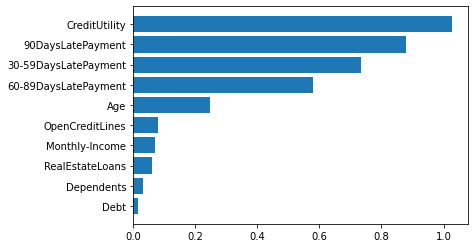

In [247]:
iv_dict = dict(sorted(iv_dict.items(), key=lambda item: item[1]))
plt.barh(list(iv_dict.keys()), list(iv_dict.values()))

We can see that Credit Utility is one of the most influential variable. Although I thought debt and monthly income would be up above, but that is not the case.

In [248]:
for feature in features:
    train[feature] = train[feature].map(woe_dict[feature])

In [249]:
for feature in features:
    test[feature] = test[feature].map(woe_dict[feature])

In [262]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [263]:
train

,SeriousDlqin2yrs,CreditUtility,Age,30-59DaysLatePayment,Debt,Monthly-Income,OpenCreditLines,90DaysLatePayment,RealEstateLoans,60-89DaysLatePayment,Dependents
135021,0,1.0,0.209404,1.000000,0.612473,0.491599,0.787668,1.0,1.000000,1.000000,1.000000
144277,0,1.0,0.724462,1.000000,1.000000,0.000000,1.000000,1.0,0.658441,1.000000,1.000000
141818,0,1.0,0.398567,1.000000,0.612473,0.491599,0.862336,1.0,0.000000,1.000000,1.000000
34212,0,1.0,0.101443,1.000000,0.000000,0.000000,0.787668,1.0,1.000000,1.000000,1.000000
126068,0,1.0,0.209404,0.518855,1.000000,0.491599,0.787668,1.0,0.658441,0.287214,0.321516
...,...,...,...,...,...,...,...,...,...,...,...
119880,0,1.0,1.000000,1.000000,0.000000,0.000000,0.772660,1.0,1.000000,1.000000,0.576829
103695,0,1.0,0.724462,0.518855,0.612473,0.491599,1.000000,1.0,1.000000,1.000000,0.576829
131933,0,1.0,0.209404,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000
146868,0,1.0,0.101443,1.000000,1.000000,0.000000,0.000000,1.0,0.658441,1.000000,1.000000


In [264]:
test

,SeriousDlqin2yrs,CreditUtility,Age,30-59DaysLatePayment,Debt,Monthly-Income,OpenCreditLines,90DaysLatePayment,RealEstateLoans,60-89DaysLatePayment,Dependents
59771,0,1.0,0.398567,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000
21363,0,1.0,0.398567,1.0,1.000000,0.705646,1.000000,1.0,1.000000,1.0,1.000000
127325,0,1.0,0.209404,1.0,1.000000,0.491599,1.000000,1.0,1.000000,1.0,0.321516
140510,0,0.0,0.209404,1.0,1.000000,0.491599,0.787668,1.0,0.658441,1.0,1.000000
144298,0,0.0,0.209404,1.0,0.612473,0.491599,1.000000,1.0,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
149729,0,1.0,0.209404,1.0,0.612473,1.000000,1.000000,1.0,1.000000,1.0,0.576829
23524,0,1.0,0.209404,1.0,0.000000,0.705646,1.000000,1.0,0.244981,1.0,0.576829
21679,0,0.0,0.398567,1.0,0.612473,0.000000,1.000000,1.0,1.000000,1.0,1.000000
15150,0,1.0,0.724462,1.0,0.612473,0.491599,1.000000,1.0,0.775963,1.0,1.000000


Our dataset looks nice and is ready to be fed to the model. Before that let's save all the variables that we'll need for future predictions.

In [265]:
variables = {
    'MonthlyIncomeMedian': MonthlyIncomeMedian,
    'DependentsMedian': DependentsMedian,
    'WoEDict': woe_dict
}

In [266]:
with open('saved/variables.obj', 'wb') as fp:
    pickle.dump(variables, fp)

In [277]:
with open('saved/scaler.obj', 'wb') as fp:
    pickle.dump(scaler, fp)

## Modelling

In [267]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc

In [268]:
X_train = train[features]
y_train = train['SeriousDlqin2yrs']

X_test = test[features]
y_test = test['SeriousDlqin2yrs']

In [269]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(127500, 10) (127500,)
(22500, 10) (22500,)


**Logistic Regression**

In [270]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
lr_prob = lr.predict_proba(X_test)[:, 1]

**XGB Classifier**

In [271]:
xgb = XGBClassifier(scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1))
xgb.fit(X_train, y_train)
xgb_prob = xgb.predict_proba(X_test)[:, 1]

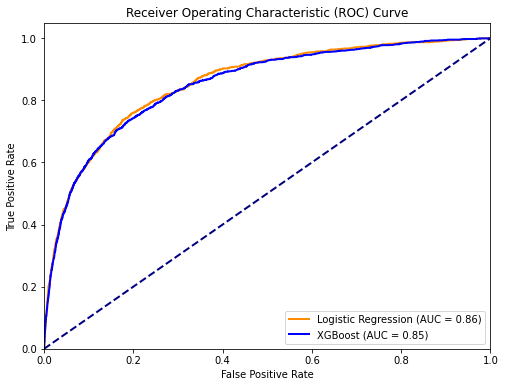

<Figure size 432x288 with 0 Axes>

In [293]:
logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(y_test, lr_prob)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_prob)

logistic_roc_auc = auc(logistic_fpr, logistic_tpr)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {logistic_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='blue', lw=2, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
plt.draw()
plt.savefig('result/roc_auc.jpg', dpi=300)

In [282]:
print(f'Logistic AUC Score: {logistic_roc_auc:.5f}')
print(f'XGBoost AUC Score: {xgb_roc_auc:.5f}')

Logistic AUC Score: 0.85608
XGBoost AUC Score: 0.85133


In [283]:
lr_pred = lr.predict(X_test)

In [284]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     21029
           1       0.22      0.75      0.34      1471

    accuracy                           0.81     22500
   macro avg       0.60      0.78      0.61     22500
weighted avg       0.93      0.81      0.85     22500



In [285]:
confusion_matrix(y_test, lr_pred)

array([[17064,  3965],
       [  373,  1098]], dtype=int64)

In [288]:
optimal_idx = np.argmax(logistic_tpr - logistic_fpr)
optimal_threshold = logistic_thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold}')

Optimal Threshold: 0.4882909235428589


In [287]:
with open('saved/logistic_model.obj', 'wb') as fp:
    pickle.dump(lr, fp)

In [279]:
logistic_tpr - logistic_fpr

array([0.        , 0.00063226, 0.00131207, ..., 0.00147415, 0.00104617,
       0.        ])